In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Q1
## We will show how to compute the SVD of a matrix using an eigenvalue solver
Let $A\in \mathbb{R}^{n\times n}$, and let the full SVD decomposition of $A$ be written as $A = U\Sigma V^T$. Define the $2n\times 2n$ matrix
$$ M =
\begin{bmatrix}
0 & A^T \\
A & 0
\end{bmatrix}.
$$

## A
Verify that $M$ is symmetric.

## B
One can show that symmetric matrices are diagonalizable and have real eigenvalues. You may assume this without proving it. Find an eigenvalue decomposition of the form $M = X\Lambda X^{-1}$, in terms of the SVD of $A$.

# Q2
## A
Using the full singular value decomposition,
$$A =  
\begin{bmatrix}
\hat{U} & U_0
\end{bmatrix}
\begin{bmatrix}
\hat{\Sigma} & \mathbf{0} \\
\mathbf{0} & \mathbf{0}
\end{bmatrix}
\begin{bmatrix}
\hat{V}^T \\ V_0^T
\end{bmatrix},$$
derive a practical algorithm for computing the pseudo inverse of any matrix $A\in \mathbb{R}^{m\times n}$. Do not assume that the matrix is full rank or that $m>n$. Your algorithm should have an additional parameter `tol` $\geq 0$ such that any singular value $\sigma_i <$ `tol` is treated as being exactly zero.

## B
Implement your algorithm in Python to solve a given least squares problem (you will use this in part C). You may use the built in function `svd` to compute the SVD of $A$. Note that your algorithm should not explicitly calculate the pseudo inverse matrix, rather it should solve a linear system for a given right hand side vector.

## C
Let `y` be an array of $m=27$ points uniformly space on the interval $[-5, 6]$. Let $A$ be the $m\times n$ Vandermonde matrix for an $n-1$ degree polynomial sampled at the $m$ points in `y`. Let $b = \sin(\pi y/5) + y/5$. Using the result of part B, compute the least squares solution for $n=2, 4, 7, 23$ and compare the results in a graph. Do this first for `tol`$=0$. Show what happens when you increase `tol`.



# Q3
In the cells below I provide code to load an image that I took some years ago at a conference in Corsica. It will load image data and convert it into a two dimensional array of 64bit floating point values, normalized so that all values are within the interval $[0, 1]$. Each value of the array encodes a pixel of the image. A value of zeros indicates pure black and a value of one indicates pure white.

Let the resulting image matrix be $A=$ `img_array`. Note that $A\in \mathbb{R}^{m\times n}$ with $m=750$ and $n=1000$.

Let $A = \hat{U}\hat{\Sigma}\hat{V}^T$ be the reduced SVD of the image matrix. Let $u_j$ and $v_j$ be the columns of the matrices $\hat{U}$ and $\hat{V}$, respectively. The reduced SVD representation of the image can be expressed as the *rank revealing decomposition*,
$$A = \sum_{j=1}^r \sigma_j u_j v_j^T,$$
where $r$ is the rank of the matrix. This shows that the matrix $A$ can be represented as a sum of rank one matrices (the outer product $u_j v_j^T$ is a rank one matrix), weighted by the singular values $\sigma_j$.

# A
What is the maximum value that $r$ can take for the matrix $A$ (stored in `img_array`)?

# B
Compute the reduced SVD of $A$ (stored in `img_array`) and plot the singular values

# C
Suppose that, as in Q2, we set a threshold `tol` $\geq 0$ such that any singular value $\sigma_i <$ `tol` is treated as being exactly zero. This will result in a reduced rank representation of the matrix, with a new rank $\tilde{r} \leq r$. The above formula becomes
$$\tilde{A} = \sum_{j=1}^{\tilde{r}} \sigma_j u_j v_j^T. $$
Using different values of `tol`, compute the low rank approximation of the image matrix $\tilde{A}$ and use `imshow` (see below) with a greyscale colormap to view it. Note the corresponding reduced rank $\tilde{r}$. Find the value of `tol` that yields a good balance between lowering $\tilde{r}$ as much as possible while maintaining, by your own subjective opinion, a reasonable appearance of the compressed image $\tilde{A}$.

# D
How much memory, in bytes, does it take to store the original greyscale image?

# E
What is the minimum amount of memory, in bytes, required to store the information from the SVD decomposition needed to compute the low rank approximation? **Hint: you can do much better than storing the matrix $\tilde{A}$ if you instead think about storing the necessary elements of the SVD.**

# F
What happens if you use `float32` values to store the SVD? Is the image quality of the compressed image reduced compared to the `float64` version from part C?

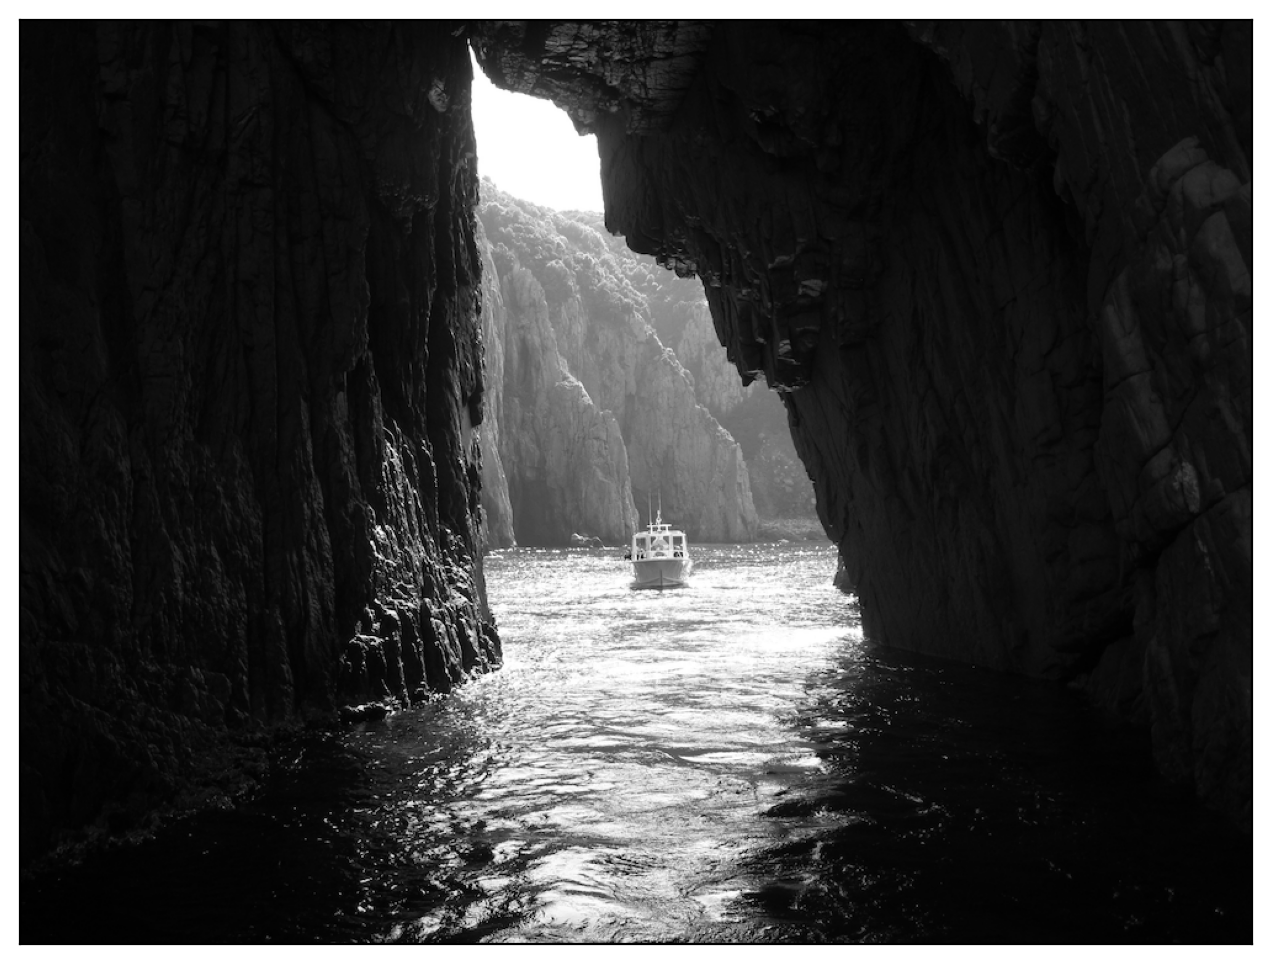

In [4]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://github.com/newby-jay/MATH381-Fall2025-JupyterNotebooks/raw/refs/heads/main/corsica.tiff'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
# img = Image.open('corsica.tiff')
figure(1, [8, 6])
imshow(img, cmap='gray')
xticks([])
yticks([]);

In [5]:
img_array_four_channels = array(img) ## easy to convert it to a numpy array
## this tiff image format has four color channels (red, gree, blue, transparency)
print(img_array_four_channels.shape) # red, green, blue, and alpha

(750, 1000, 4)


In [6]:
## each of the first three color channels has the same information
## let us see if all the values are the same
print(all(img_array_four_channels[..., 0] == img_array_four_channels[..., 1]))
print(all(img_array_four_channels[..., 0] == img_array_four_channels[..., 2]))
# last channel is different
print(all(img_array_four_channels[..., 0] == img_array_four_channels[..., 3]))

True
True
False


In [7]:
## data format is 'uint8' for 'unsigned' (i.e., non negative) 8bit integers
print(img_array_four_channels.dtype)

uint8


In [8]:
## We only need greyscale (one channel)
## we can pick any of the first three channels
img_array = img_array_four_channels[..., 0]
## Convert it to float64
img_array = float64(img_array)
## Normalize the values to be in [0, 1]
img_array -= img_array.min()
img_array /= img_array.max()
print(img_array.min(), img_array.max())

0.0 1.0


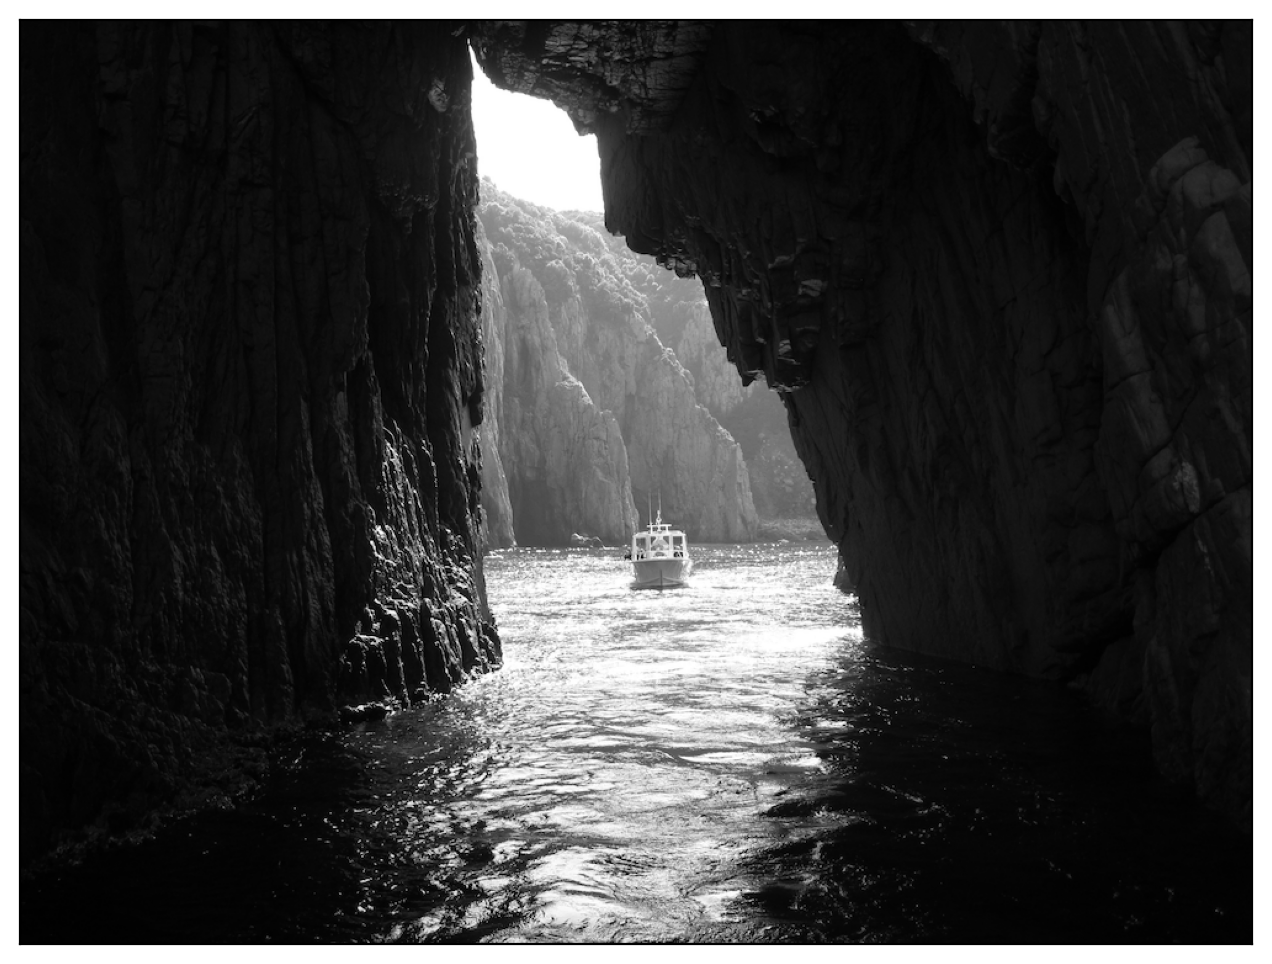

In [9]:
figure(1, [8, 6])
imshow(img_array, cmap='gray');
xticks([])
yticks([]);